In [43]:
import datajoint as dj
from faker import Faker
fake = Faker()
schema = dj.Schema('Hiring')

In [44]:
@schema
class Manager(dj.Manual):
    definition="""
    manager_id : bigint unsigned  
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint 
    email : varchar(30) 
    """

In [47]:
@schema
class Job(dj.Manual):
    definition = """
    job_id : varchar(12)   
    ---
    -> Manager
    job_title : varchar(30) 
    open_date : date 
    end_date : date 
    description : varchar(200) 
    minimum_annual_salary : bigint unsigned  
    maximum_annual_salary : bigint unsigned  
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [46]:
@schema
class Skill(dj.Lookup):
    definition = """
    skill : varchar(24)
    """
    
    

In [48]:
@schema
class Applicant(dj.Manual):
    definition = """
    applicant_id : varchar(15) 
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint unsigned  
    email : varchar(30)
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [49]:
@schema
class Application(dj.Manual):
    definition = """
    -> Applicant
    -> Job
    --- 
    current_position : varchar(30) 
    """

In [50]:
@schema
class Interview(dj.Manual):
    definition = """
    -> Application
    ---
    interview_date : date 
    """

In [51]:
@schema
class Offer(dj.Manual):
    definition = """
    -> Interview
    ---
    start_date : date
    salary : bigint unsigned  
    """

In [52]:
@schema
class Acceptance(dj.Manual):
    definition = """
    -> Offer
    --- 
    """

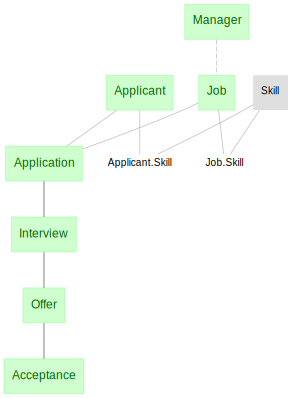

In [53]:
dj.Diagram(schema)

In [42]:
schema.drop()

Populate

In [54]:
import random
from tqdm import tqdm
from faker import Faker
fake = Faker()

In [55]:
Faker.seed(0)
Manager.insert(dict(
    manager_id=fake.random_int(100000, 900000),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    email=fake.email()) for _ in range(10))

In [56]:
Manager()

manager_id,first_name,last_name,phone,email
134574,Chloe,Douglas,20636619644,sheltondavid@example.org
300348,Sally,Walker,72461666241,millerluke@example.net
373145,Bryan,Sellers,13934166345,cortezraymond@example.net
475441,Brandy,Odonnell,29347482742,donald19@example.com
503958,Katherine,Fisher,76620417634,thull@example.com
613054,Daniel,Arnold,25919560061,lisa83@example.net
658433,Tonya,Patrick,31054642443,corey15@example.com
673812,Briana,Wallace,54602810789,kellylopez@example.org
687007,Craig,Hamilton,98523085497,tammywoods@example.net
755638,Aaron,Snyder,56675998506,jessicapadilla@example.org


In [57]:
keys = Manager.fetch("KEY")

In [58]:
for index in range(1, 18):
    skill_list=["SQL","Python","Excel","Word","JAVA","Tableu","R Language","Database Management","Powerpoint","C++ Language","Rust"] 
    Skill.insert1(dict(
    skill=fake.random.choices(skill_list)
    ),skip_duplicates=True)

In [59]:
Skill()

skill
C++ Language
Database Management
JAVA
Powerpoint
R Language
Rust
Tableu
Word


In [70]:
Job()

job_id,manager_id,job_title,open_date,end_date,description,minimum_annual_salary,maximum_annual_salary
b9-5331889F,687007,Database Admin,2023-12-10,2023-12-17,Some forward staff beyond chair recently. Stage plant view.,62000,119000
d0-7779043e,475441,Data Scientist,2023-12-10,2024-01-03,Beat drop step child. Key baby interview senior stop. Where economic detail. Floor itself news experience must cut. Since method left plant evening. Past Republican common increase.,77000,126000
d3-7585809f,687007,Data Scientist,2023-12-10,2023-12-12,Kid he weight before control board. Newspaper read somebody land. Control instead company where future model.,47000,146000
e8-4335880o,300348,Data Analyst,2023-12-10,2023-12-27,Pick expert commercial special network foreign. Play speech theory choice computer yard career deal. Should wide dog car do his part. Pick too blue street. Other majority final when new clear these.,76000,130000
E9-3058118d,134574,Data Scientist,2023-12-10,2024-01-06,Rather score protect according. Break about establish. Cell of course its respond. Collection instead today itself language remember.,33000,137000
F6-0486311W,687007,Data Scientist,2023-12-10,2024-01-04,Through despite cause cause believe son would mouth. Total financial role together range line beyond its. Policy daughter need kind miss artist truth trouble.,64000,118000
H8-6423074e,373145,Data Scientist II,2023-12-10,2023-12-19,Walk place myself his. Entire expect investment yard responsibility watch. Money fish garden relationship it center accept. Choice produce type none guess we no.,40000,118000
M9-6764745I,475441,Data Analyst,2023-12-10,2023-12-12,Few now four management. Significant his himself clearly very. Expert stop area along individual.,59000,129000
O0-9776011K,755638,Data Scientist,2023-12-10,2024-01-07,Heart fact catch even front. Responsibility full per among clearly word. House nature fall long dream answer. Tax rock few structure.,77000,133000
O7-5776934H,503958,Database Admin,2023-12-10,2024-01-07,Act relationship section five focus. Chance either six success on responsibility southern. Son might trip at. American address such former.,78000,103000


In [69]:
Faker.seed(0)

for index in range(1, 22):  
    job_list = ["Data Engineer", "Data Scientist II", "Data Administrator", "Data Scientist","Data Analyst","Database Admin"]
    
    Job.insert1(dict(
    random.choice(keys),
    job_id=fake.pystr_format(),
    job_title=fake.random.choice(job_list),
    open_date=fake.past_date(start_date='-3m'),
    end_date=fake.future_date(),
    description=fake.text(),
    minimum_annual_salary=fake.random_int(min=30000, max=80000, step=1000),
    maximum_annual_salary=fake.random_int(min=90000, max=150000, step=1000),
    ))

   

In [ ]:
Job.insert([
    ["EZ898980","Analyst",20-9-2023,22-10-2023,"gathers, cleans, and studies data sets to help solve problems using different skill and tools.",10000,40000,409503],
    ["EG898323","Data Scientist",1-4-2023,4-5-2023,"collects large amounts of data using analytical, statistical, and programmable skills.",70000,90000,892699],
    ["ES898429","Database Admin",30-5-2023,22-7-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",10000,10500,892699],
    ["EW898323","Programmer",13-5-2023,12-7-2023,"designing and updating software solutions, writing and updating source-code and managing various operating systems.",60000,80060,409503],
    ["ES3256422","Web Developer",23-6-2023,22-8-2023,"develops World Wide Web applications using a client–server model. The applications typically use HTML, CSS, and JavaScript",700000,905000,546399],
    ["ED898453","Software Engineer",10-5-2023,12-7-2023,"applies the engineering design process to design, develop, test, maintain, and evaluate computer software.",5000000,6000000,892699],
    ["EQ4598423","full-stack developer",3-10-2023,22-11-2023,"work progressively on both front-end and back-end systems.",40000,50500,546399],
    ["EA498421","Systems analyst",10-12-2023,13-1-2024,"information technology professional who specializes in analyzing, designing and implementing information systems.",300000,400000,777937],
    ["EE454499","Computer Systems Analyst",11-3-2023,10-4-2023,"regularly perform software audits and work with IT managers to execute improvements. ",90050,100000,469720],
    ["EZ894412","DevOps Engineer",14-9-2023,15-10-2023,"develop, improve, and maintain systems to build, distribute, integrate, and support systems",80000,80500,801062],

    ["EZ893420","Database Admin",30-9-2023,22-11-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,514378],
    ["EQ8208419","Database Admin",1-11-2023,9-12-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,546399],
    ["ED823420","Database Admin",4-5-2023,12-7-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,514378],
    ["ER843434","Database Admin",13-10-2023,23-12-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,892699],
    ["ET848424","Database Admin",17-5-2023,25-6-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,469720],
    ["EF892432","Database Admin",1-8-2023,1-10-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,892699],
    ["EK898455","Database Admin",5-6-2023,26-7-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,728468],
    ["EK898246","Database Admin",31-8-2023,5-10-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,892699],
    ["EG898453","Database Admin",28-5-2023,15-7-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,546399],
    ["ED896566","Database Admin",2-2-2023,5-3-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,788478],
    ["EA364365","Database Admin",30-9-2023,12-12-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,728468],
    ["ET453546","Database Admin",2-1-2023,12-6-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,788478],
    ["ES436741","Database Admin",7-9-2023,10-11-2023,"ensure that the databases run efficiently and securely.managing access to systems that store company information.",100000,10500,605221],
])

In [33]:
Applicant()

applicant_id,first_name,last_name,phone,email
A6-4952853K,Stacey,Knight,30052367498,brownjermaine@example.net
a7-9664360S,Matthew,Miller,53155619637,landryjason@example.com
b1-6231584U,Cody,Valenzuela,74225341584,monica65@example.net
b5-6995889r,Douglas,Cox,11172533426,jessicawilson@example.net
C8-8406805Q,Susan,Murphy,69055002629,penabrenda@example.net
D8-5483303C,Erin,Johnson,96602431610,timothyhooper@example.com
f6-0425351z,Jon,White,73923211352,krista65@example.com
g1-4718271n,Laura,Velez,19824928174,carolynarmstrong@example.org
g7-9032438w,Mary,Mejia,82295967343,rwarren@example.net
h0-4235752L,Kimberly,Torres,26575197750,brewerthomas@example.org


In [32]:
Applicant.insert(dict(
    applicant_id=fake.pystr_format(),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    email=fake.email()) for _ in range(50))

In [34]:
Applicant.Skill.insert(
    Applicant.proj() * Skill & 'RAND() < 0.3')


In [35]:
Applicant.Skill()

applicant_id,skill
A6-4952853K,C++ Language
a7-9664360S,C++ Language
C8-8406805Q,C++ Language
g7-9032438w,C++ Language
h2-8187291l,C++ Language
H9-8246085X,C++ Language
I6-1984489x,C++ Language
k6-8056058J,C++ Language
N6-0293048B,C++ Language
q1-7402869M,C++ Language


In [44]:
Application()

applicant_id,job_id,current_position


In [ ]:
Application.insert(dict(
    applicant_id=fake.pystr_format(),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    email=fake.email()) for _ in range(50))